In [1]:
# load library
library(rvest)
library(ggplot2)
library(FinCal)

Warning message:
"package 'FinCal' was built under R version 3.6.3"

In [2]:
stock <- readline(prompt="Enter stock ticker: ")

income_statement <- paste0('https://www.marketwatch.com/investing/stock/',stock,'/financials')
income_statement_page <- income_statement %>% read_html()
balance_sheet <- paste0('https://www.marketwatch.com/investing/stock/',stock,'/financials/balance-sheet')
balance_sheet_page <- balance_sheet %>% read_html()
cash_flow <- paste0('https://www.marketwatch.com/investing/stock/',stock,'/financials/cash-flow')
cash_flow_page <- cash_flow %>% read_html()
key_metrics <- paste0('https://www.marketwatch.com/investing/stock/',stock)

convert <- function(x) {
  x <- gsub('[(]',"-",x)
  x <- gsub('[)]',"",x)
  if (grepl("B", x)) {
    x <- gsub('[B]',"",x) 
    x <- as.double(x)
    x*1000
  } else if (grepl("M", x)) {
    x <- gsub('[M]',"",x)
    x <- as.double(x) 
    x*1
  } else if (grepl("-", x)) {
    x <- gsub('-',"0",x)
    x <- as.double(x)
  }
}
N<-5
income_names <- income_statement_page %>% html_nodes(".overflow__cell .fixed--cell") %>% html_text()
income_nums <- income_statement_page %>% html_nodes(".cell__content span") %>% html_text()
balance_names <- balance_sheet_page %>% html_nodes(".overflow__cell .fixed--cell") %>% html_text()
balance_nums <- balance_sheet_page %>% html_nodes(".cell__content span") %>% html_text()
cash_names <- cash_flow_page %>% html_nodes(".overflow__cell .fixed--cell") %>% html_text()
cash_nums <- cash_flow_page %>% html_nodes(".cell__content span") %>% html_text()
x<-1
while (income_names[x] != "Sales/Revenue") {x<-x+1}
Revenue <- income_nums[(5*(x-1)+1):(5*x)]
for(i in 1:5){
  Revenue[i] <- convert(Revenue[i])
}
Revenue <- as.numeric(Revenue)
x<-1
while (income_names[x] != "Net Income") {x<-x+1}
Net_Income <- income_nums[(5*(x-1)+1):(5*x)]
for(i in 1:5){
  Net_Income[i] <- convert(Net_Income[i])
}
Net_Income <- as.numeric(Net_Income) 
x<-1
while (balance_names[x] != "Total Equity") {x<-x+1}
Equity <- balance_nums[(5*(x-1)+1):(5*x)]
for(i in 1:5){
  Equity[i] <- convert(Equity[i])
}
Equity <- as.numeric(Equity)
x<-1
while (balance_names[x] != "ST Debt & Current Portion LT Debt") {x<-x+1}
Debt <- balance_nums[(5*(x-1)+1):(5*x)]
for(i in 1:5){
  Debt[i] <- convert(Debt[i])
}
Debt <- as.numeric(Debt)
x<-1
while (cash_names[x] != "Net Operating Cash Flow") {x<-x+1}
Operating_Cash <- cash_nums[(5*(x-1)+1):(5*x)]
for(i in 1:5){
  Operating_Cash[i] <- convert(Operating_Cash[i])
}
Operating_Cash <- as.numeric(Operating_Cash)
ROIC <- c()
for(i in 1:N) {
  x <- Net_Income[i]/(Equity[i] + Debt[i]) 
  ROIC <- append(ROIC,round(x,2))
}
ROE <- c()
for(i in 1:N) {
  x <- Net_Income[i]/Equity[i]
  ROE <- append(ROE,round(x,2))
}
df <- data.frame (
  year = 1:5,
  Revenue = Revenue,
  Net_Income = Net_Income, 
  Debt = Debt ,
  Equity = Equity,
  Operating_Cash = Operating_Cash,
  ROIC = ROIC,
  ROE = ROE
)

Enter stock ticker: CVS


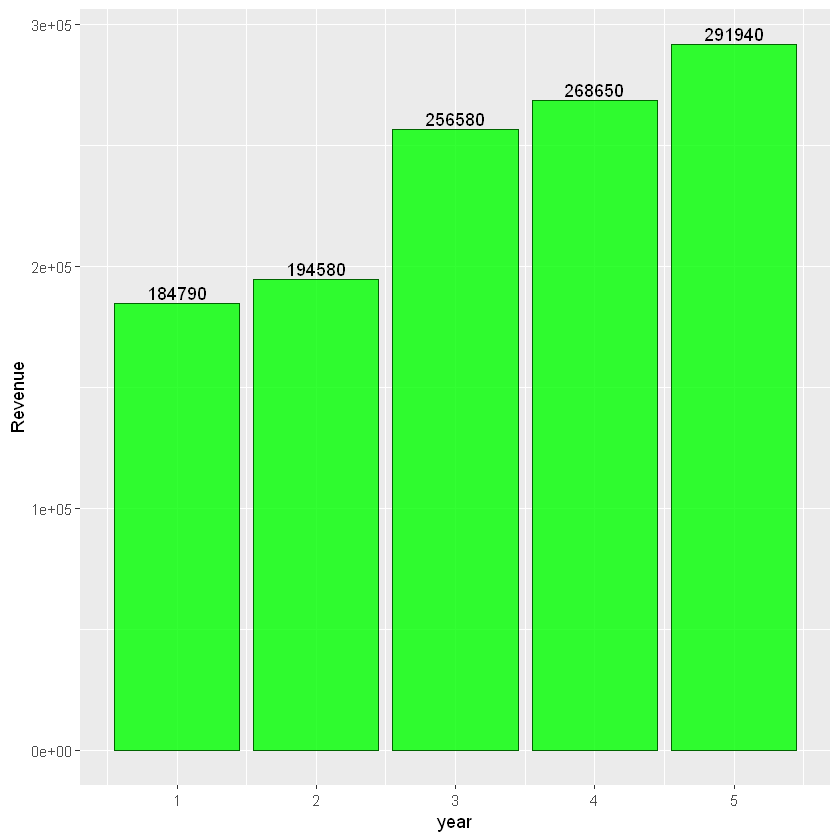

In [3]:
ggplot(df, aes(year,Revenue)) +
  geom_bar(stat="identity", fill = "green", color = "darkgreen", alpha = 0.8) +
  geom_text(aes(label=Revenue), vjust = -0.3)

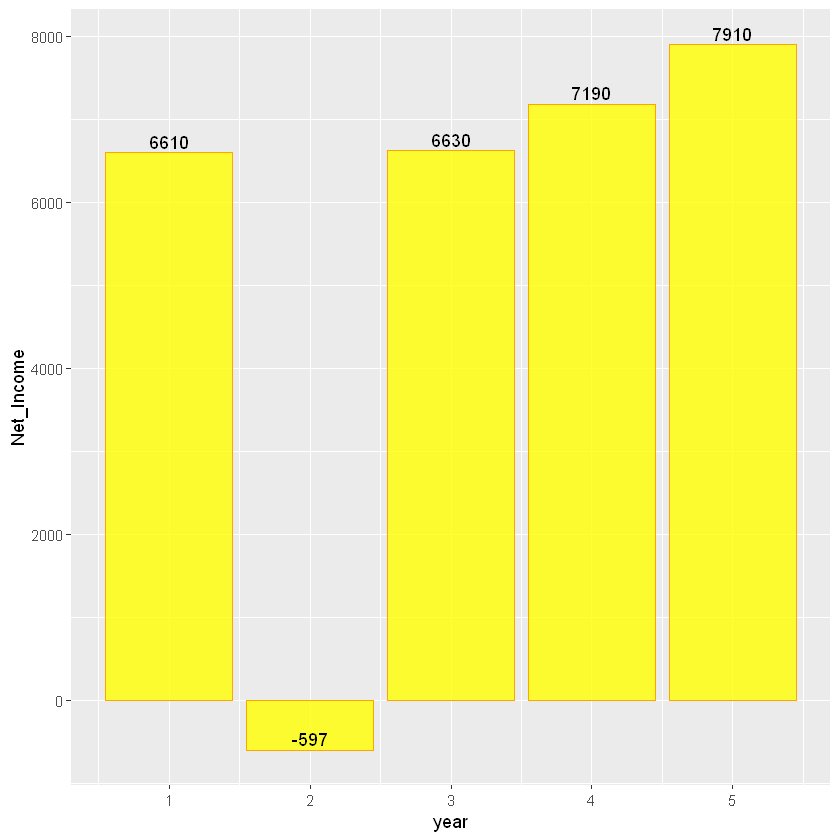

In [4]:
ggplot(df, aes(year,Net_Income)) +
  geom_bar(stat="identity", fill = "yellow", color = "orange", alpha = 0.8) +
  geom_text(aes(label=Net_Income), vjust = -0.3)

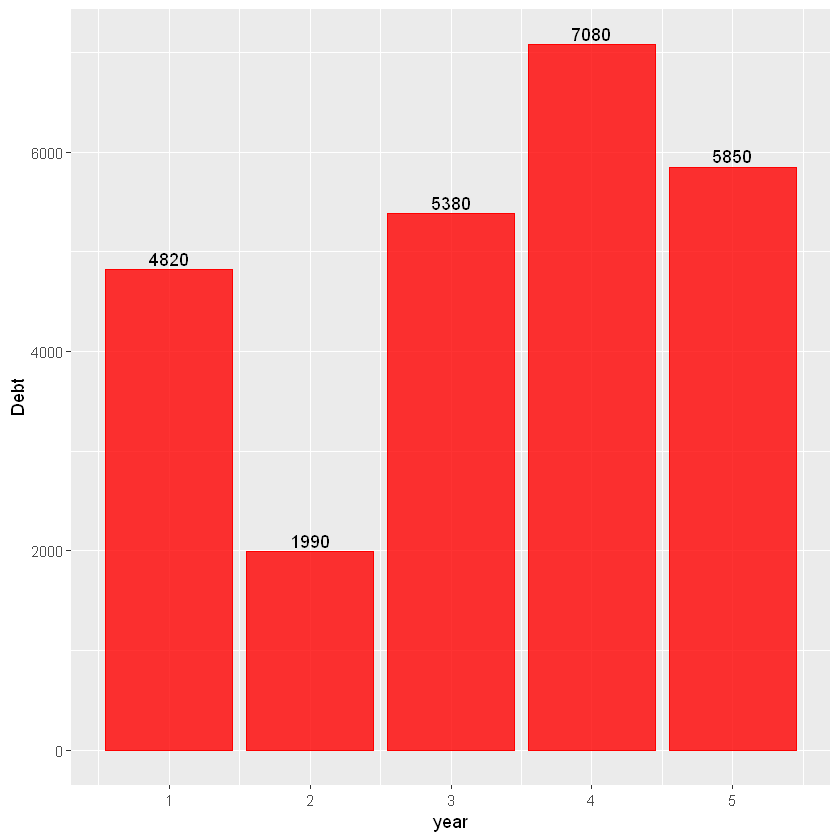

In [5]:
ggplot(df, aes(year,Debt)) +
  geom_bar(stat="identity", fill = "red", color = "red", alpha = 0.8) +
  geom_text(aes(label=Debt), vjust = -0.3)

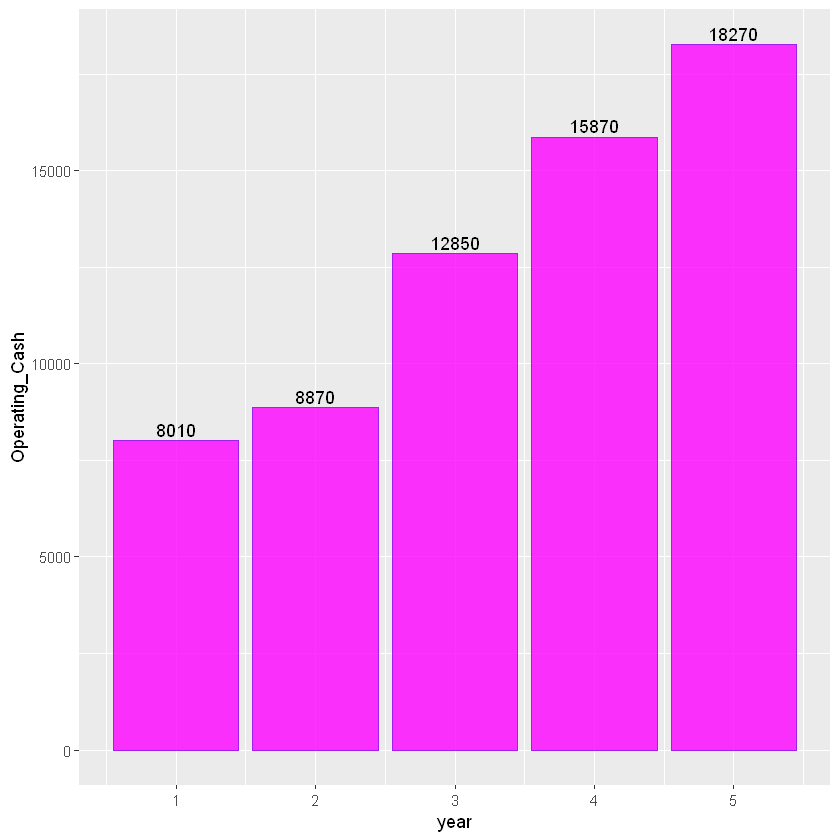

In [6]:
ggplot(df, aes(year,Operating_Cash)) +
  geom_bar(stat="identity", fill = "magenta", color = "purple", alpha = 0.8) +
  geom_text(aes(label=Operating_Cash), vjust = -0.3)

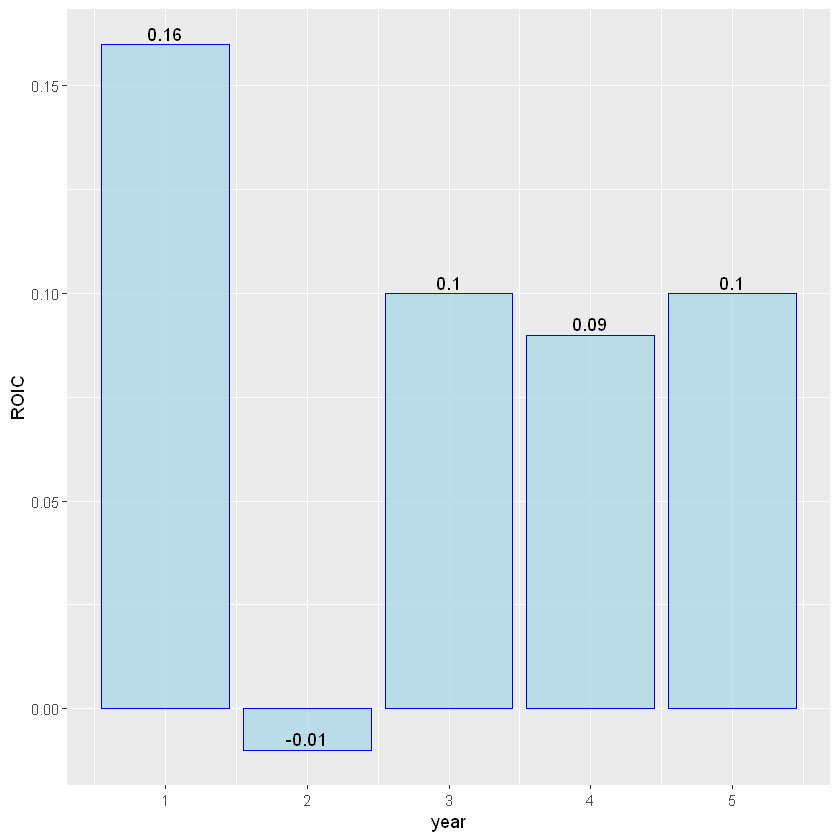

In [7]:
ggplot(df, aes(year,ROIC)) +
  geom_bar(stat="identity", fill = "lightblue", color = "blue", alpha = 0.8) +
  geom_text(aes(label=ROIC), vjust = -0.3)


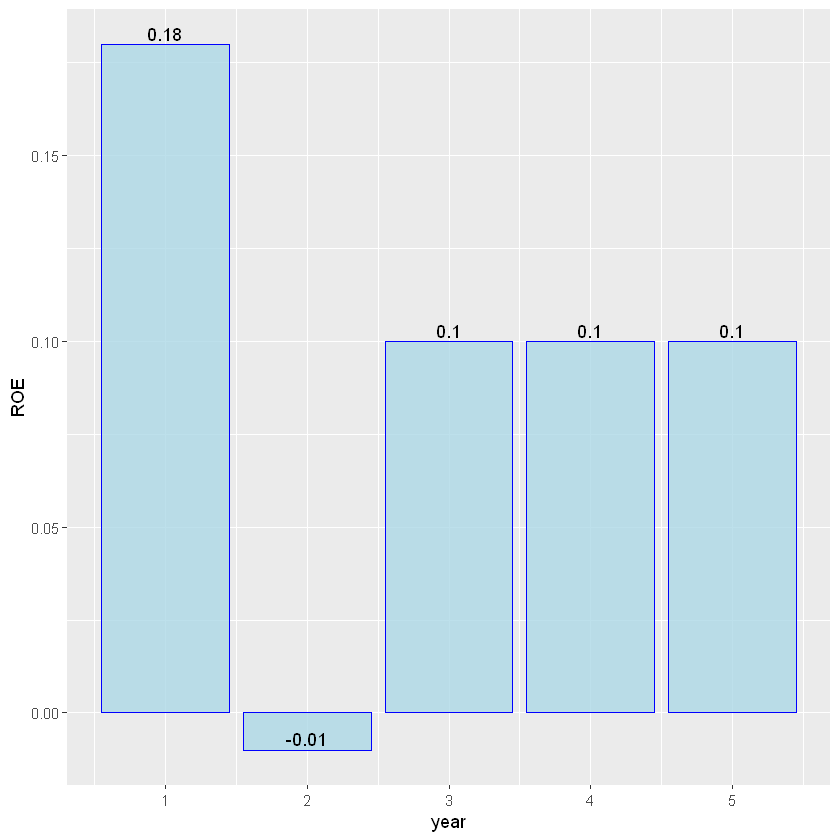

In [8]:
ggplot(df, aes(year,ROE)) +
  geom_bar(stat="identity", fill = "lightblue", color = "blue", alpha = 0.8) +
  geom_text(aes(label=ROE), vjust = -0.3)

In [9]:
#Valuation
x<-1
while (income_names[x] != "EPS (Basic)") {x<-x+1}
EPS <- income_nums[(5*x)]
EPS <- as.double(EPS)
PE <- readline(prompt="Enter PE: ")
PE <- as.double(PE)
shares <- readline(prompt="Enter # shares (in millions): ")
shares <- as.numeric(shares)
while (cash_names[x] != "Free Cash Flow") {x<-x+1}
FCF <- cash_nums[(5*x)]
FCF <- convert(FCF)
FCF <- as.numeric(FCF)/shares

a <- FCF
for (i in 1:8) {
  a[i+1] <- a[i]+a[i]*.1
}
BuyPrice1 <- sum(a)-a[1]
proj_growth <- as.numeric(readline(prompt = "Enter projected growth: "))
Future_Value <- fv(proj_growth,10, -EPS)*PE
Present_Value <- pv(.15,10,-Future_Value)
BuyPrice2 <- Present_Value/2
cat("Buy Prices: ",round(BuyPrice1,2),";",round(BuyPrice2,2),".",sep="")


Enter PE: 21
Enter # shares (in millions): 1376
Enter projected growth: .1
Buy Prices: 143.99;40.39.